As always, we start by loading our modules and doing a bit of set up:



In [1]:
import pandas as pd
import numpy as np
from plotnine import *

theme_set(theme_minimal())
ubase = "https://raw.githubusercontent.com/distant-viewing/hdpy/refs/heads/main/"



# Visualizing the Paris Metro System

To start, let's read into Python a new dataset. Take a few moments to understand its
structure:



In [2]:
metro = pd.read_csv(f"{ubase}/data/geo_paris_metro.csv")
metro

,name,line,line_color,lon,lat,lon_end,lat_end
0,La Defense - Grande Arche,1,#ffbe00,2.237018,48.892187,2.247932,48.888631
1,Esplanade de la Defense,1,#ffbe00,2.247932,48.888631,2.260515,48.884708
2,Pont de Neuilly (Avenue de Madrid),1,#ffbe00,2.260515,48.884708,2.271687,48.881192
3,Les Sablons (Jardin d'acclimatation),1,#ffbe00,2.271687,48.881192,2.289323,48.875594
4,Argentine,1,#ffbe00,2.289323,48.875594,2.295905,48.875150
...,...,...,...,...,...,...,...
366,Gare de Lyon,14,#640082,2.373014,48.843986,2.379554,48.840001
367,Bercy,14,#640082,2.379554,48.840001,2.386632,48.833339
368,Cour Saint-Emilion,14,#640082,2.386632,48.833339,2.375748,48.829990
369,Bibliotheque Francois Mitterrand,14,#640082,2.375748,48.829990,2.368033,48.827271




Now, plot the dataset with longitude on the x-axis and latitude on the y-axis.
This is just a map!



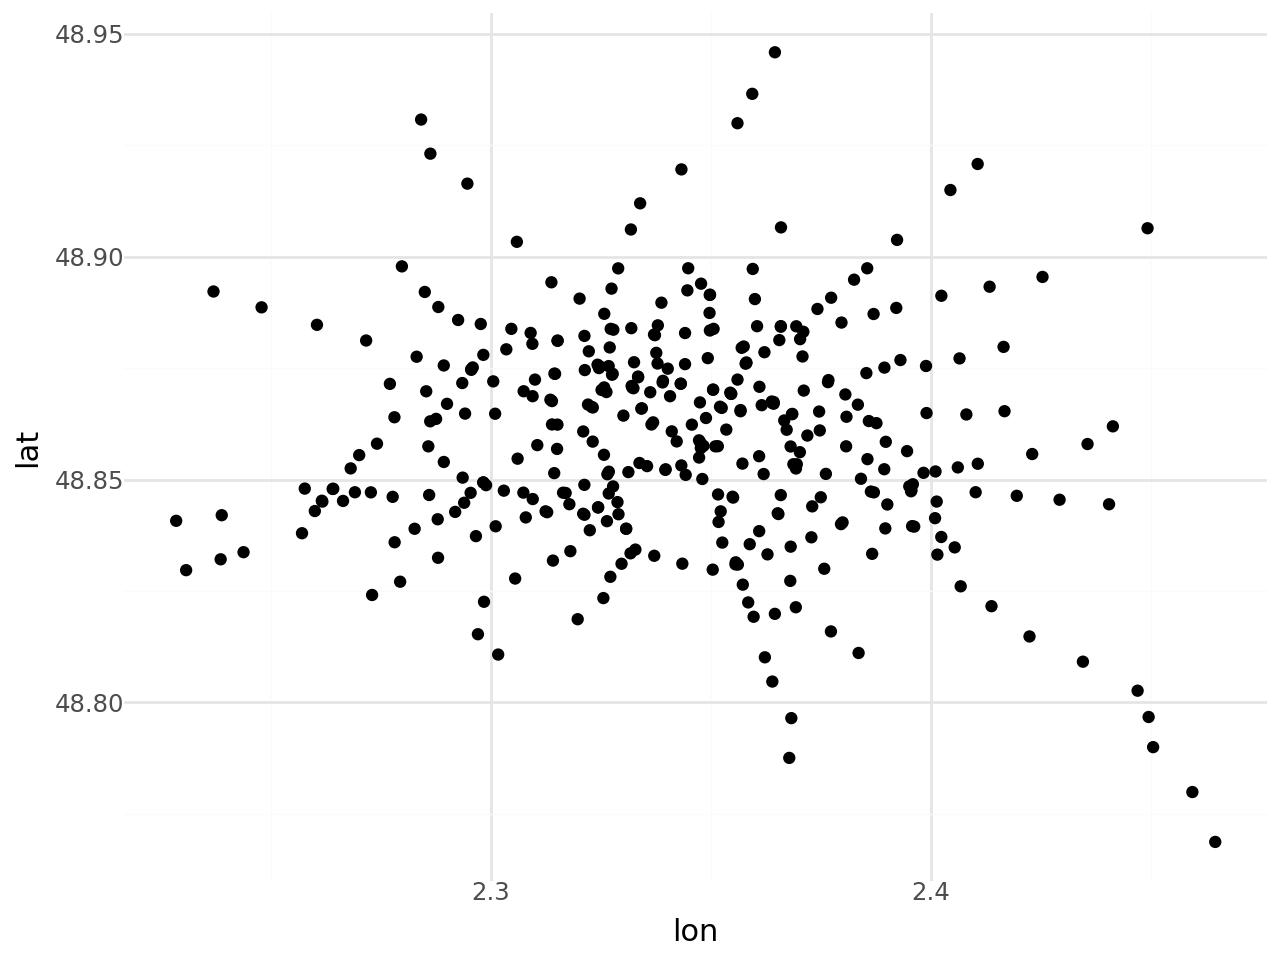

In [3]:
(ggplot(metro) +
  geom_point(aes(x="lon",y="lat")))



Adding to what you had above, include color for the points by setting color equal
to "line_color":



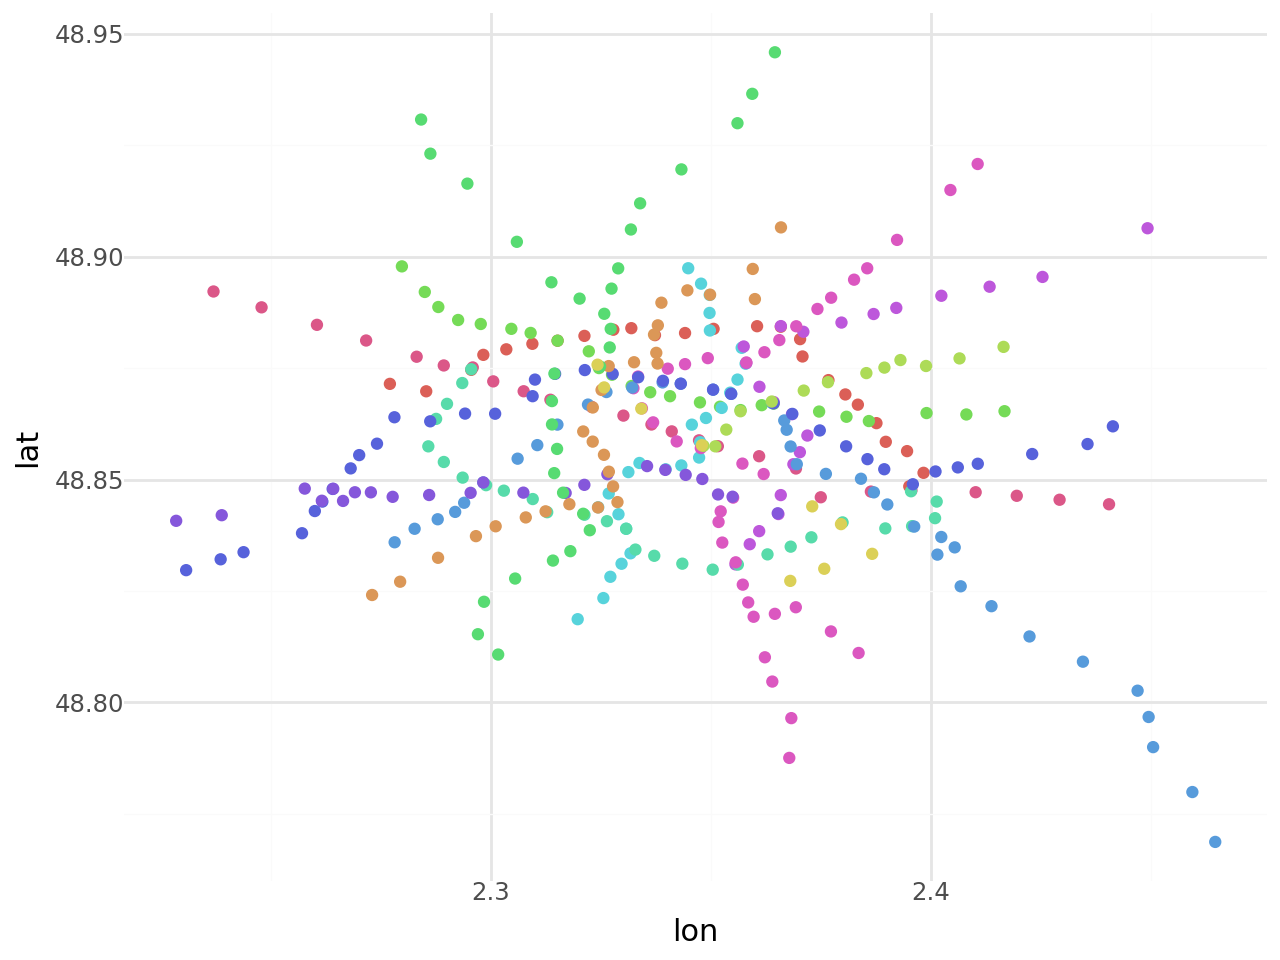

In [6]:
(ggplot(metro) +
  geom_point(aes(x="lon",y="lat",color="line_color"),show_legend=False))



You'll notice that the line colors are hex codes, but Python isn't using the codes
themselves. It doesn't know that these are colors. Modify the plot by adding the
`scale_color_identity()` to the plot as an extra line. Compare this to an official
map of the Paris Metro [here](http://www.vidiani.com/maps/maps_of_europe/maps_of_france/paris/detailed_metro_system_map_of_paris_city.jpg).



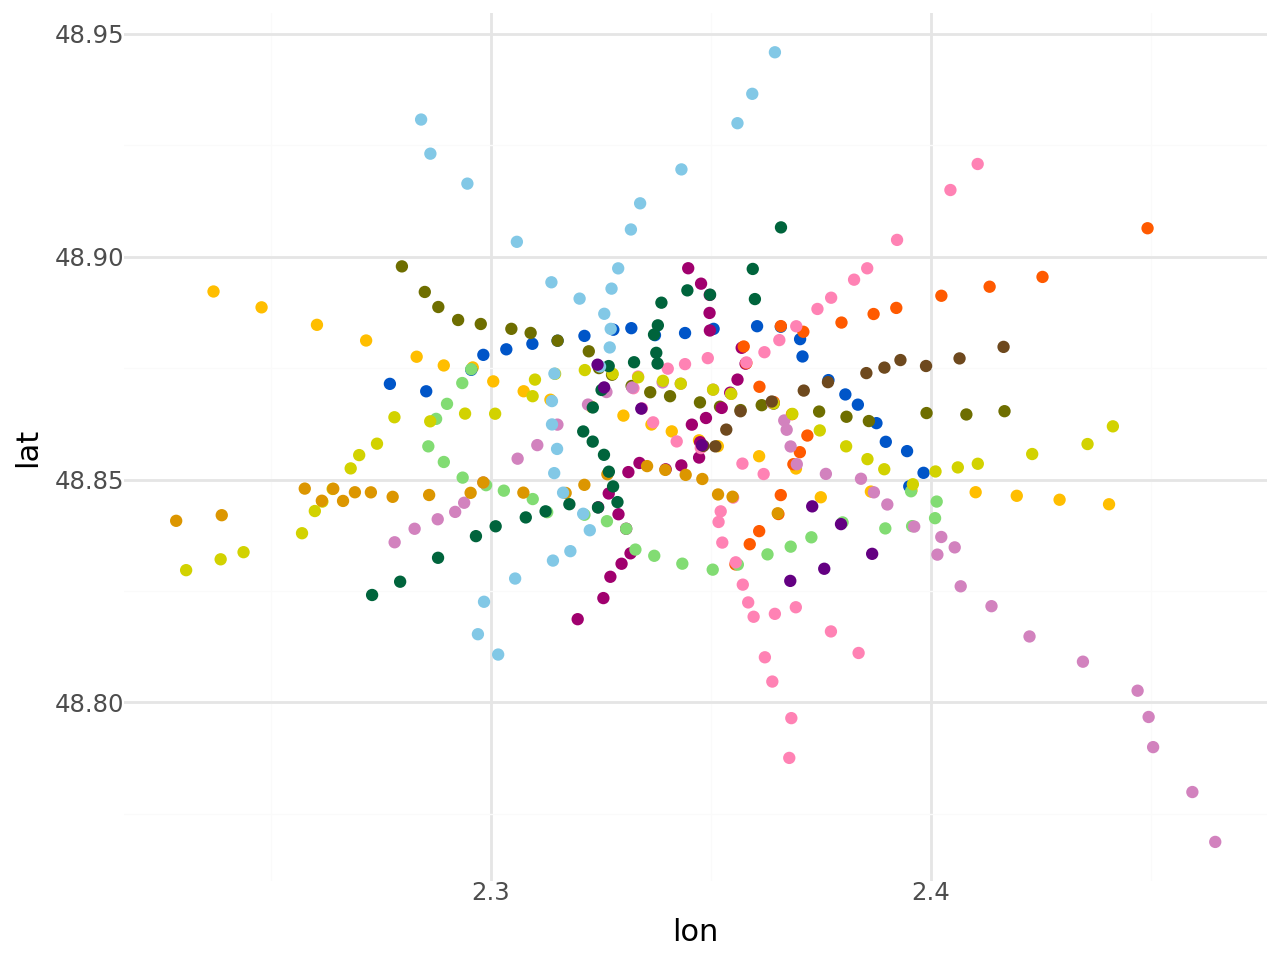

In [7]:
(ggplot(metro) +
  geom_point(aes(x="lon",y="lat",color="line_color"),show_legend=False) +
  scale_color_identity())



This is a perfect dataset to use the `geom_segement` function. Add this to the points
you had above by setting xend to "lon_end" and yend to "lat_end". Include the line
colors for the segments again. This should look even more like the official map.



/usr/local/lib/python3.12/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_segment : Removed 18 rows containing missing values.


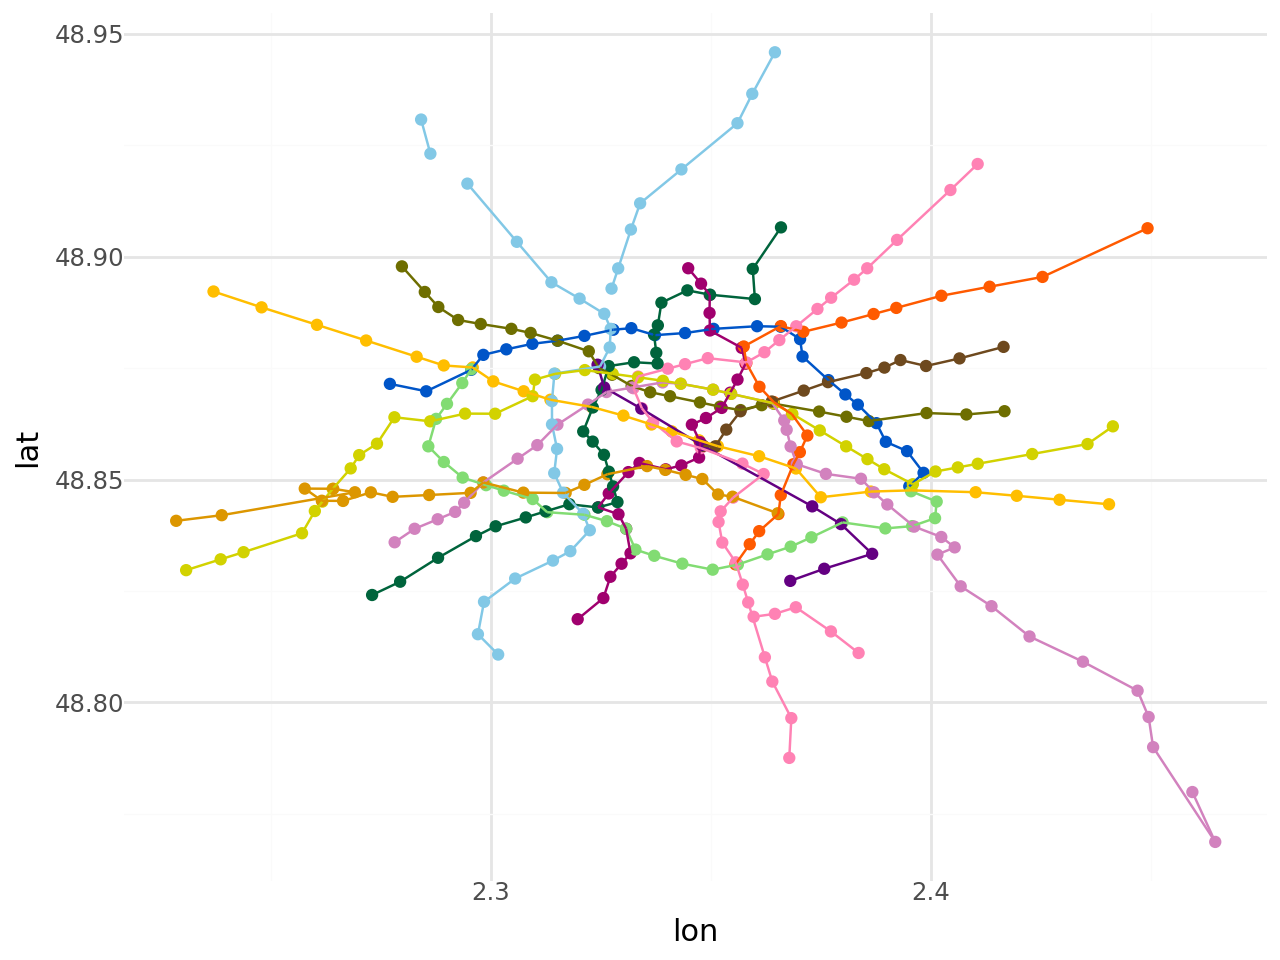

In [9]:
(ggplot(metro) +
  geom_point(aes(x="lon",y="lat",color="line_color"),show_legend=False) +
  geom_segment(aes(x="lon",xend="lon_end",y="lat",yend="lat_end",color="line_color"),show_legend=False) +
  scale_color_identity())



Create a new dataset called `metro_one` consisting of just those points that are from the
metro line 1.



In [12]:
metro_one = metro.loc[metro["line"] == 1]



Modify our previous plot by only having a segment and color for line one. Think about
what steps are needed before you start coding.



/usr/local/lib/python3.12/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_segment : Removed 2 rows containing missing values.


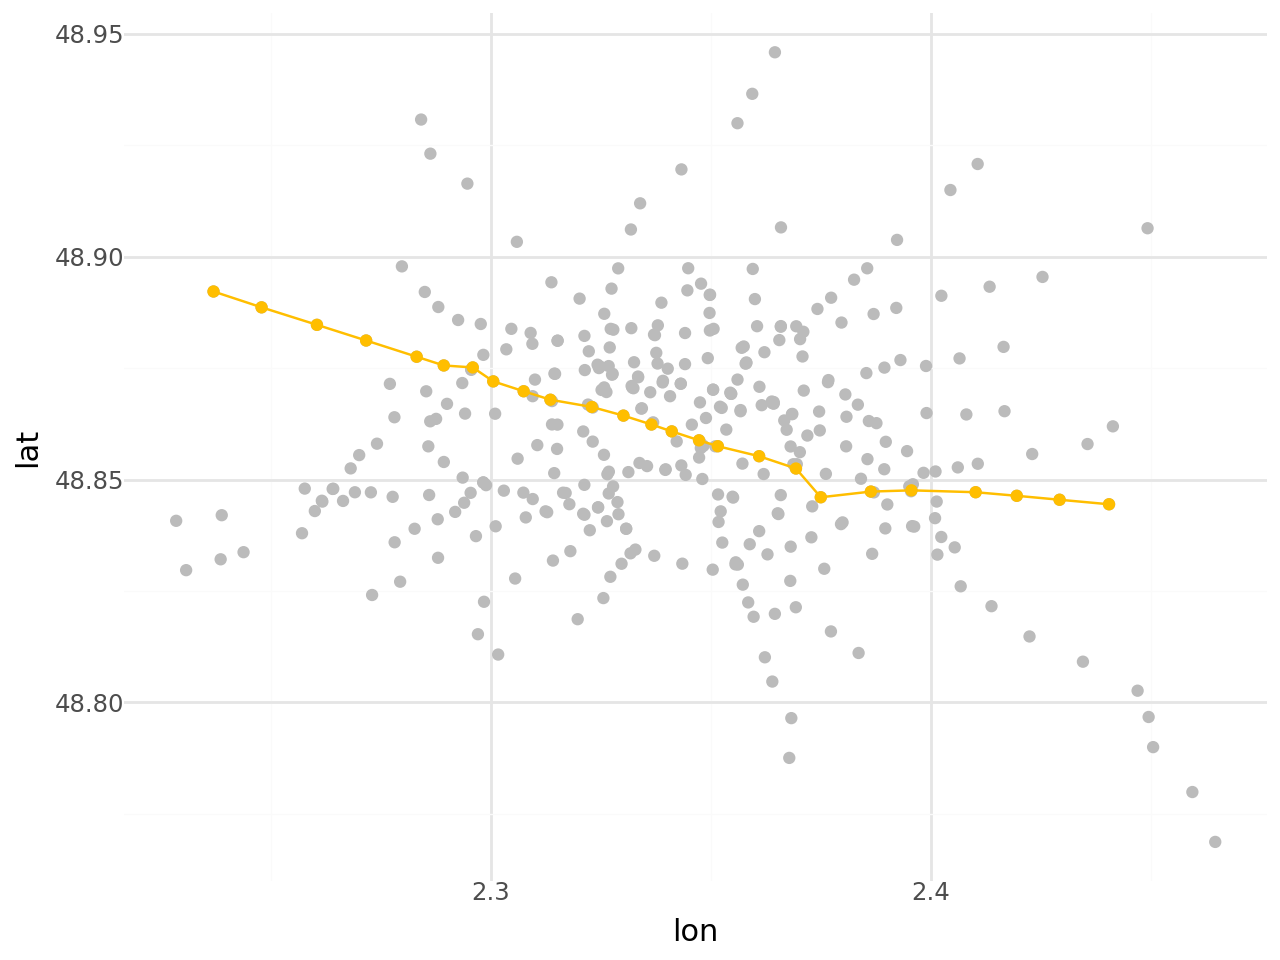

In [20]:
(ggplot(metro) +
  geom_point(aes(x="lon",y="lat"),color = "#bbbbbb") +
  geom_point(aes(x="lon",y="lat",color="line_color"),data=metro_one,show_legend=False) +
  geom_segment(aes(x="lon",xend="lon_end",y="lat",yend="lat_end",color="line_color"),show_legend=False,data=metro_one) +
  scale_color_identity())



Finally, recreate the plot above with line 4, but here include another layer consisting
of the labels for the line using `geom_text`. Add an option `ha="left"` to make the labels
go to the size of the station rather making it overrun the points.



/usr/local/lib/python3.12/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_segment : Removed 1 rows containing missing values.


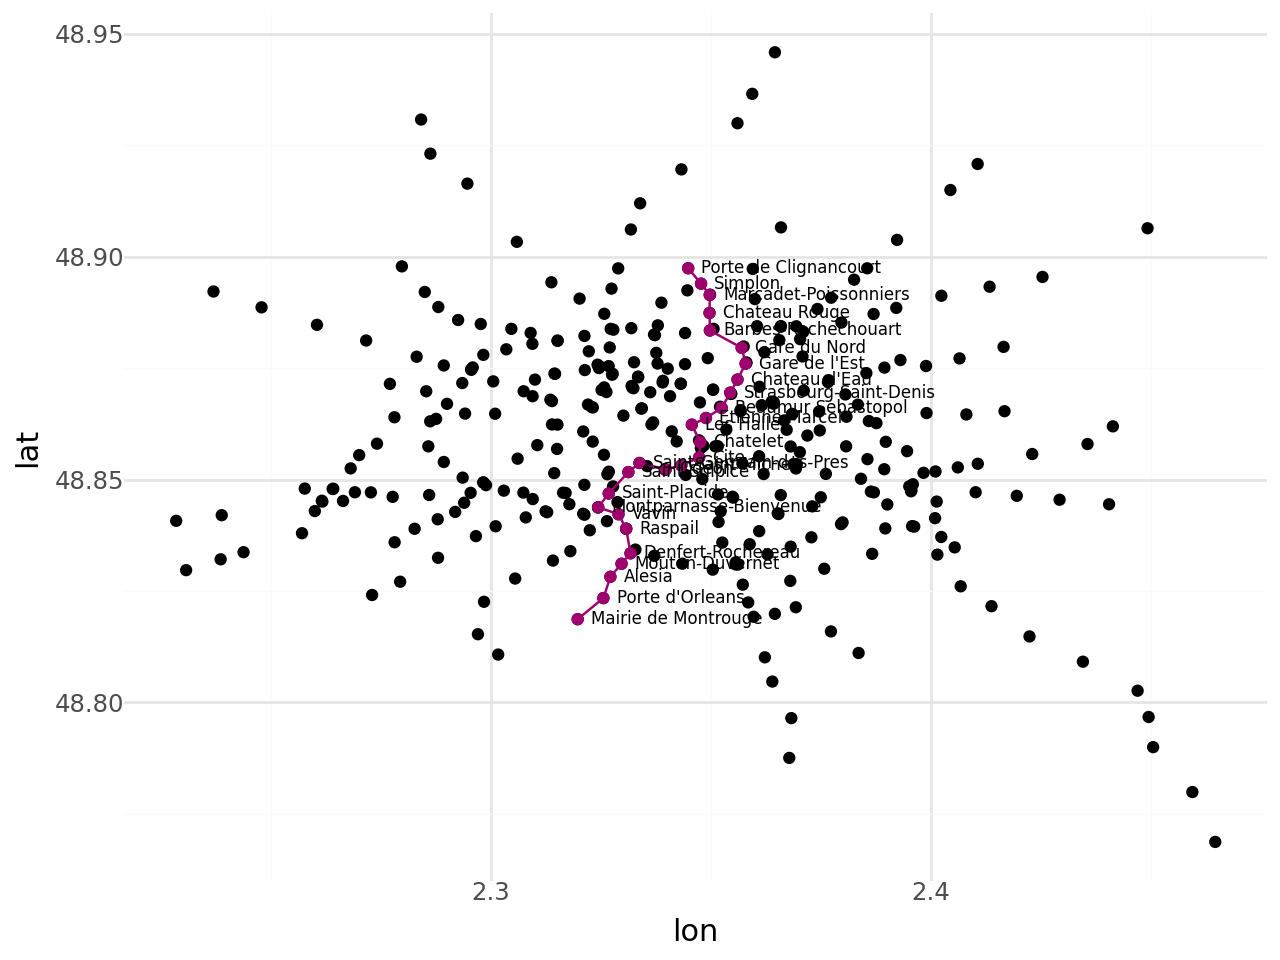

In [41]:
metro_four = metro.loc[metro["line"] == 4]
(ggplot(metro) +
  geom_point(aes(x="lon",y="lat")) +
  geom_point(aes(x="lon",y="lat",color="line_color"),data=metro_four,show_legend=False) +
  geom_segment(aes(x="lon",xend="lon_end",y="lat",yend="lat_end",color="line_color"),show_legend=False,data=metro_four) +
  geom_text(aes(x="lon",y="lat",label="name"),ha="left",data=metro_four,nudge_x= .003,size=6) +
  scale_color_identity())